In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import re
import random
import string
import matplotlib.pyplot as plt
from utilities import clean_arabic_tweet
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tqdm import tqdm

In [3]:
pd.set_option('display.max_colwidth', -1)

# Data Preprocessing

## Loading Train Data

In [4]:
train_data_path = './data/DA_train_labeled.tsv'
test_data_path = './data/DA_dev_labeled.tsv'

In [5]:
train_data = pd.read_csv(train_data_path, sep='\t')
test_data = pd.read_csv(test_data_path, sep='\t')

## Delete province_labels 

In [6]:
del train_data['#4_province_label']
del test_data['#4_province_label']

## Plot tweets ferquency for every country

<AxesSubplot:>

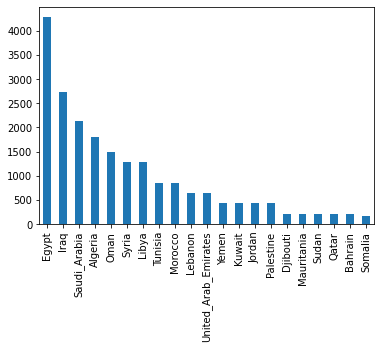

In [7]:
fig, ax = plt.subplots()
train_data['#3_country_label'].value_counts().plot(ax=ax, kind='bar')

<AxesSubplot:>

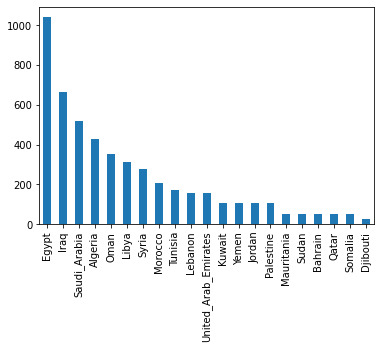

In [8]:
fig, ax = plt.subplots()
test_data['#3_country_label'].value_counts().plot(ax=ax, kind='bar')

In [9]:
test_data['#3_country_label'].value_counts()

Egypt                   1041
Iraq                    664 
Saudi_Arabia            520 
Algeria                 430 
Oman                    355 
Libya                   314 
Syria                   278 
Morocco                 207 
Tunisia                 173 
Lebanon                 157 
United_Arab_Emirates    157 
Kuwait                  105 
Yemen                   105 
Jordan                  104 
Palestine               104 
Mauritania              53  
Sudan                   53  
Bahrain                 52  
Qatar                   52  
Somalia                 49  
Djibouti                27  
Name: #3_country_label, dtype: int64

In [10]:
train_data['#3_country_label'].value_counts()

Egypt                   4283
Iraq                    2729
Saudi_Arabia            2140
Algeria                 1809
Oman                    1501
Syria                   1287
Libya                   1286
Tunisia                 859 
Morocco                 858 
Lebanon                 644 
United_Arab_Emirates    642 
Yemen                   429 
Kuwait                  429 
Jordan                  429 
Palestine               428 
Djibouti                215 
Mauritania              215 
Sudan                   215 
Qatar                   215 
Bahrain                 215 
Somalia                 172 
Name: #3_country_label, dtype: int64

## preview samples 

In [11]:
# train_data.loc[train_data['#3_country_label'] == 'Somalia']

## clean tweets

In [12]:
tarin_tweets_cleaned = (train_data['#2_tweet'].apply(clean_arabic_tweet))
test_tweets_cleaned = (test_data['#2_tweet'].apply(clean_arabic_tweet))

In [13]:
train_data['#2_tweet_clean']= tarin_tweets_cleaned
test_data['#2_tweet_clean']= test_tweets_cleaned

In [14]:
train_data.head(50)

,#1_tweetid,#2_tweet,#3_country_label,#2_tweet_clean
0,TRAIN_0,حاجة حلوة اكيد,Egypt,حاجه حلوه اكيد
1,TRAIN_1,عم بشتغلوا للشعب الاميركي اما نحن يكذبوا ويغشوا ويسرقوا ويقتلو شعوبهم ويعملوا لصالح اعدائهم,Iraq,عم بشتغلوا لشعب الاميركي اما نحن يكذبوا ويغشوا ويسرقوا ويقتلو شعوبهم ويعملوا لصالح اعداهم
2,TRAIN_2,ابشر طال عمرك,Saudi_Arabia,ابشر طال عمرك
3,TRAIN_3,منطق 2017: أنا والغريب علي إبن عمي وأنا والغريب وإبن عمي علي أخويا. #قطع_العلاقات_مع_قطر #موريتانيا_مع_قطر,Mauritania,منطق انا والغريب علي ابن عمي وانا والغريب وابن عمي علي اخويا قطع العلاقات مع قطر موريتانيا مع قطر
4,TRAIN_4,شهرين وتروح والباقي غير صيف ملينا,Algeria,شهرين وتروح والباقي غير صيف ملينا
5,TRAIN_5,يابنتى والله ما حد متغاظ ولا مفروس منك ولا بيحسدك انتى عره اساسا.,Syria,يابنتى واله ما حد متغاظ ولا مفروس منك ولا بيحسدك انتى عره اساسا
6,TRAIN_6,نفس الوقت بأكد على صاحبتي ان اي هدف هتحطه وتخططله هيبوظ والأفضل التشاؤم واننا نتوقع الأسوء دايما والفشل عشان منعشمش نفسنا ع الفاضي,Egypt,نفس الوقت باكد على صاحبتي ان اي هدف هتحطه وتخطله هيبوظ والافضل التشام وانا نتوقع الاسوء دايما والفشل عشان منعشمش نفسنا الفاضي
7,TRAIN_7,م تبطلي خرا بقا علشان مطلعهوش عليكي احترمي نفسك URL …,Egypt,تبطلي خرا بقا علشان مطلعهوش عليكي احترمي نفسك
8,TRAIN_8,ما يله دخل !,Oman,ما يله دخل
9,TRAIN_9,هو حلو بس يتخربط ع طلاب المدراس ليك مايغيرونه عدنا,Iraq,هو حلو بس يتخربط طلاب المدراس ليك مايغيرونه عدنا


In [15]:
test_data.head(50)

,#1_tweetid,#2_tweet,#3_country_label,#2_tweet_clean
0,DEV_0,قولنا اون لاين لا يا علي اون لاين لا,Egypt,قولنا اون لاين لا يا علي اون لاين لا
1,DEV_1,ههههه بايخه ههههه URL …,Oman,بايخه
2,DEV_2,ربنا يخليك يا دوك ولك المثل :D,Lebanon,ربنا يخليك يا دوك ولك المثل
3,DEV_3,#اوامر_ملكيه ياشباب اي واحد فيكم عنده شي يذكره بالعساف يجيبه له احرقه,Syria,اوامر ملكيه ياشباب اي واحد فيكم عنده شي يذكره بالعساف يجيبه له احرقه
4,DEV_4,شد عالخط حتى هيا اكويسه,Libya,شد عالخط حتى هيا اكويسه
5,DEV_5,انا صاحي ميت مالضحك ايه داااااا,Egypt,انا صاحي ميت مالضحك ايه دا
6,DEV_6,لا مين أنتِ؟ ههههههههههههههههههههههههههههههههههههههههههههههههههههههه .,Saudi_Arabia,لا مين انت
7,DEV_7,جاي عبالي رشوف,Palestine,جاي عبالي رشوف
8,DEV_8,"""\""ان شاء الله تببوا إلي وإبقى إلكن كل العمر \"" أمينن يارب URL """,Morocco,ان شاء اله تبوا الي وابقى الكن كل العمر امين يارب
9,DEV_9,الله يلعنك انت اصلا مريض انتزعت من قلبك الرحه URL …,Egypt,اله يلعنك انت اصلا مريض انتزعت من قلبك الرحه


## save the cleaned data

In [16]:
train_data.to_csv("./cleaned_data/cleaned_train_data_for_subtask1_V1_without_stop_words.csv", index=False, encoding="utf-8-sig")
test_data.to_csv("./cleaned_data/cleaned_test_data_for_subtask1_V1_without_stop_words.csv", index=False, encoding="utf-8-sig")

## get unique words - vocab

In [17]:
vocab = []
for tweet in tqdm(train_data['#2_tweet_clean'].tolist()):
    for word in  text_to_word_sequence(tweet):
        if word not in vocab:
            vocab.append(word)


100%|██████████| 21000/21000 [00:38<00:00, 541.45it/s]


In [18]:
len(vocab)

49126

## find unique vocab of each country

In [19]:
class_unique_words = {}
for class_name in train_data['#3_country_label'].unique().tolist():
    class_unique_words[class_name] = []

In [ ]:
looped = 0
for tweet, class_name in zip(train_data['#2_tweet_clean'].tolist(), train_data['#3_country_label'].tolist()):
    looped+=1
    for word in text_to_word_sequence(tweet):
        if word not in class_unique_words[class_name]:
            exist_in_another_country = False
            for key in class_unique_words.keys():
                if key == class_name:
                    continue
                elif word in class_unique_words[key]:
                    exist_in_another_country = True
                    class_unique_words[key].remove(word)
                    break
            if exist_in_another_country==False:
                class_unique_words[class_name].append(word)

In [ ]:
country_name_unique_vocab ={}
country_name, unique_vocab =[], []
for class_name in class_unique_words.keys():
    country_name_unique_vocab[class_name] = len(class_unique_words[class_name])
    country_name.append(class_name)
    unique_vocab.append(len(class_unique_words[class_name]))



In [ ]:
country_name_unique_vocab

In [ ]:
country_name_unique_vocab_df = df_ = pd.DataFrame(index=range(0,21), columns=['country_name', 'unique_vocab_count'])


In [ ]:
country_name_unique_vocab_df['country_name'] = country_name
country_name_unique_vocab_df['unique_vocab_count'] = unique_vocab


In [ ]:
country_name_unique_vocab_df.head(21)

In [ ]:
country_name_unique_vocab_df.plot(x='country_name', y='unique_vocab_count', kind='bar')

In [28]:
#remove arabic formal clitics from tweets.
stop_words_file = open('formal clitics stop words.txt','r',encoding="utf8")
stop_words_list = [line.strip() for line in stop_words_file]

def remove_stopwords(text):
    text_tokens = text.strip().split(" ")
    tokens_filtered= [word for word in text_tokens if not word in stop_words_list]
    return (" ").join(tokens_filtered)
#2_tweet_clean
train_data['#2_tweet_clean']= train_data['#2_tweet_clean'].apply(remove_stopwords)
    
test_data['#2_tweet_clean']= test_data['#2_tweet_clean'].apply(remove_stopwords)
    
    
display(train_data['#2_tweet_clean'][5])
display(test_data['#2_tweet_clean'][6])

'يابنتى واله حد متغاظ مفروس منك بيحسدك انتى عره اساسا'

'مين انت'